# Import software libraries

In [111]:
# Import required libraries.
import sys                          # Read system parameters.
import numpy as np                  # Work with multi-dimensional arrays.
import pandas as pd                 # Manipulate and analyze data.
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))

Libraries used in this project:
- NumPy 1.19.2
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0


# Read and examine the data

In [112]:
# Read the data that was put through the ETL process in Course 2 of the CDSP Specialization. 
online_history = pd.read_pickle('data/online_history_cleaned.pickle')


# Preview the first five rows of the data.
online_history.head(5)


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT


In [113]:
# Get the shape of the data.
online_history.shape


(15206, 9)

In [114]:
# Get the data types for every column in the DataFrame.
online_history.dtypes


Invoice                object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID             object
Country                object
TotalAmount           float64
Description            object
dtype: object

# Generate summary statistics for all of the data

In [115]:
# Get a DataFrame of summary statistics that describe the data, including mean, median, standard deviation, etc.
# Be sure to include all variables, including categorical ones.

online_history.describe(include='all')

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
count,15206,15206,15206.000000,15206,15194.000000,12435,15206,15194.000000,15206
unique,8315,10,NaN,8022,NaN,2473,1,NaN,10
top,536876,85123A,NaN,2011-05-10 15:07:00,NaN,u17841,United Kingdom,NaN,CREAM HANGING HEART T-LIGHT HOLDER
freq,10,2163,NaN,10,NaN,171,15206,NaN,2163
first,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2011-12-09 12:31:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.775483,NaN,4.164267,NaN,NaN,40.705153,NaN
std,NaN,NaN,79.496270,NaN,4.377605,NaN,NaN,132.142503,NaN
min,NaN,NaN,1.000000,NaN,0.400000,NaN,NaN,0.550000,NaN
25%,NaN,NaN,2.000000,NaN,1.650000,NaN,NaN,8.850000,NaN


# Plot a bar chart for the average price per item

In [116]:
online_history.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT


<AxesSubplot:xlabel='Description'>

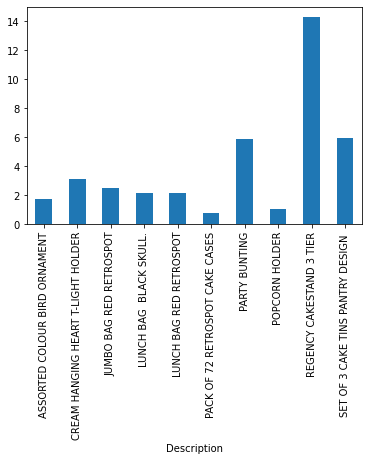

In [117]:
# Plot the average price per item using a bar chart.
# Make sure the average price is on one axis, and each distinct item description is on the other axis.
average_price_per_item = online_history.groupby('Description')['Price'].mean()




average_price_per_item.plot(kind='bar')

# Explore the distribution of the numeric variable `Price`

In [118]:
# Get a DataFrame of summary statistics for numeric variables only.

online_history.describe()

,Quantity,Price,TotalAmount
count,15206.000000,15194.000000,15194.000000
mean,16.775483,4.164267,40.705153
std,79.496270,4.377605,132.142503
min,1.000000,0.400000,0.550000
25%,2.000000,1.650000,8.850000
50%,6.000000,2.550000,16.500000
75%,12.000000,4.950000,30.360000
max,4300.000000,32.040000,4921.500000


<AxesSubplot:xlabel='Price'>

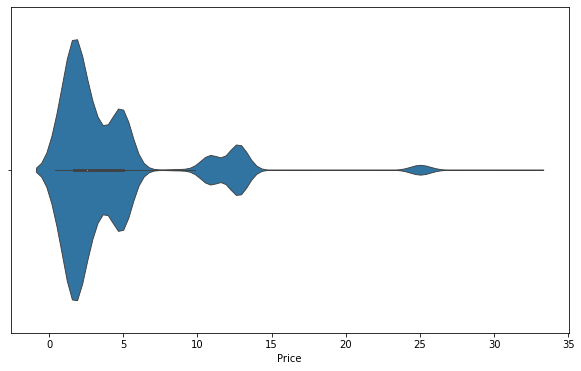

In [119]:
# Generate a violin plot for the "Price" variable.
# Decorate and style the plot however you think is best.
figure = plt.figure(figsize=(10,6))
sns.violinplot(data=online_history,x='Price',linewidth=0.9)


# Visualize correlations between numeric variables

In [120]:
# Generate a correlation matrix between all numeric variables.
corr_matrix = online_history.corr().abs()




<AxesSubplot:>

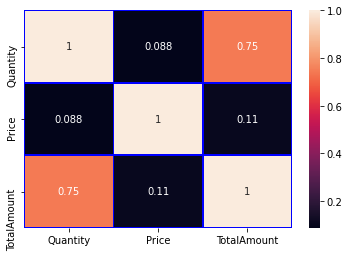

In [121]:
# Visualize the correlations with a heatmap.
sns.heatmap(corr_matrix,annot=True,linecolor='blue',linewidths=0.75)




# Transform skewed variables

(array([1.5075e+04, 7.8000e+01, 1.9000e+01, 8.0000e+00, 5.0000e+00,
        0.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([5.500000e-01, 4.926450e+02, 9.847400e+02, 1.476835e+03,
        1.968930e+03, 2.461025e+03, 2.953120e+03, 3.445215e+03,
        3.937310e+03, 4.429405e+03, 4.921500e+03]),
 <BarContainer object of 10 artists>)

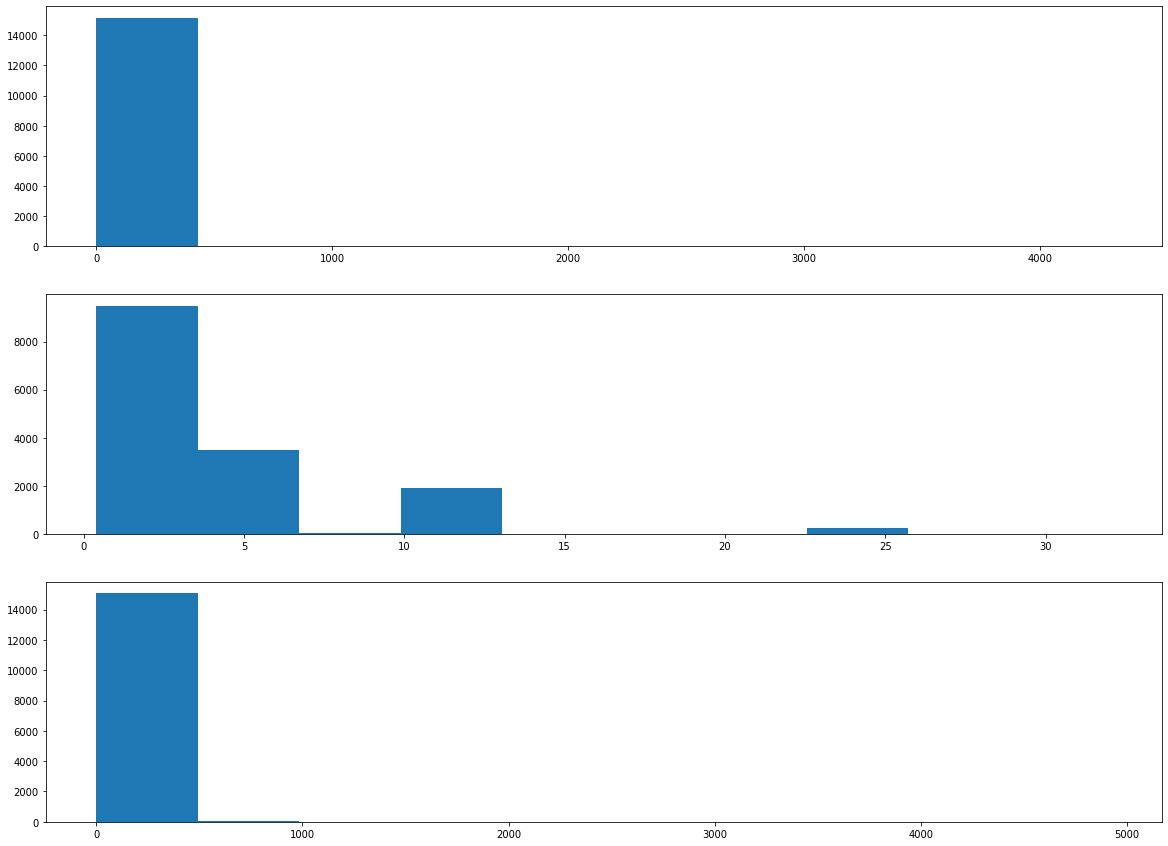

In [122]:
# Plot histograms for the original distributions of all numeric variables.
numeric_columns = list(online_history.select_dtypes(['int64','float64']).columns)
numeric_columns
fig,ax = plt.subplots(3,1,figsize=(20,15))
ax[0].hist(online_history.Quantity)
ax[1].hist(online_history.Price)
ax[2].hist(online_history.TotalAmount)

<AxesSubplot:>

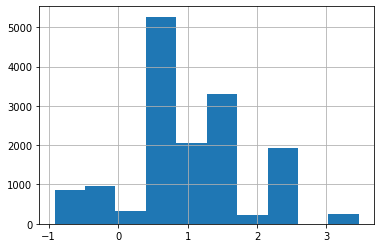

In [123]:
# Plot the log transformation of "Price".

np.log(online_history.Price).hist()


<AxesSubplot:>

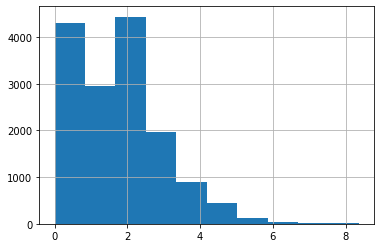

In [124]:
# Plot the log transformation of "Quantity".

np.log(online_history.Quantity).hist()



<AxesSubplot:>

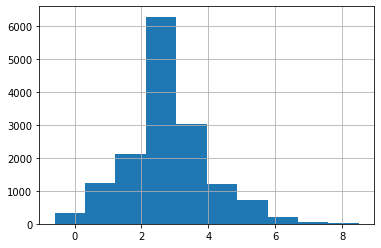

In [125]:
# Plot the log transformation of "TotalAmount".

np.log(online_history.TotalAmount).hist()



# Analyze time series data

In [126]:
online_history.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT


In [127]:
# Obtain the number of invoices by month.
num_invoices_by_month = online_history.InvoiceDate.dt.month.value_counts().sort_index()


# Print the number of invoices by month.
num_invoices_by_month


1      923
2      956
3     1345
4     1140
5     1384
6     1203
7     1227
8     1169
9     1378
10    1257
11    1726
12    1498
Name: InvoiceDate, dtype: int64

<AxesSubplot:>

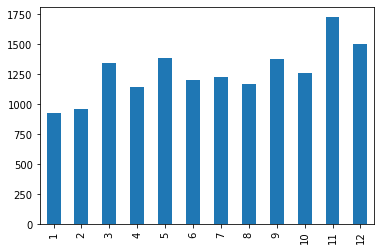

In [128]:
# Use a bar chart to plot the number of invoices by month.

num_invoices_by_month.plot(kind='bar')



# Identify and handle missing data

In [130]:
# Identify any missing data for all variables.
print(online_history.isnull().sum()/len(online_history))


Invoice        0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000789
CustomerID     0.182231
Country        0.000000
TotalAmount    0.000789
Description    0.000000
dtype: float64


In [132]:
# Print the current shape of the data.
print(online_history.shape)


# Remove rows of data where "CustomerID" is unknown.
online_history.drop(online_history[online_history['CustomerID'].isnull()].index,inplace=True)


# Print the new shape of the data.
online_history.shape


(15206, 9)


(12435, 9)

In [133]:
# Fill in N/A values for "Price" and "TotalAmount" with 0.
online_history.Price.fillna(0,inplace=True)
online_history.TotalAmount.fillna(0,inplace=True)



# Confirm there are no longer any missing values.
online_history.isnull().any().sum()


0

# One-hot encode the `Description` variable

In [136]:
# One-hot encode the "Description" variable with dummy variables for each unique description.
# Prefix each dummy variable name with "Description".
description_encoded = pd.get_dummies(online_history.Description,prefix='Description',drop_first=True)


# Preview the first five rows of the DataFrame.
description_encoded.head()


,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PACK OF 72 RETROSPOT CAKE CASES,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [138]:
# Concatenate the new encoded columns with the main DataFrame.
online_history = pd.concat([online_history,description_encoded],axis=1)


# Drop the original "Description" variable.
online_history.drop(['Description'],axis=1,inplace=True)


In [139]:
# Preview the first five rows of the data.

online_history.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,...,Description_SET OF 3 CAKE TINS PANTRY DESIGN,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PACK OF 72 RETROSPOT CAKE CASES,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,1,0,...,0,1,0,0,0,0,0,0,0,0
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,0,0,...,0,0,0,0,0,0,0,0,0,0
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,1,0,...,0,1,0,0,0,0,0,0,0,0
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,1,0,...,0,1,0,0,0,0,0,0,0,0
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,0,0,...,0,0,0,0,1,0,0,0,0,0


# Identify and remove columns with low variance

In [142]:
# Obtain the standard deviation of each variable.
online_history.std()


Quantity                                           77.436253
Price                                               3.506381
TotalAmount                                       132.092738
Description_CREAM HANGING HEART T-LIGHT HOLDER      0.362575
Description_JUMBO BAG RED RETROSPOT                 0.322017
Description_LUNCH BAG  BLACK SKULL.                 0.274661
Description_LUNCH BAG RED RETROSPOT                 0.288011
Description_PACK OF 72 RETROSPOT CAKE CASES         0.254417
Description_PARTY BUNTING                           0.306081
Description_POPCORN HOLDER                          0.267557
Description_REGENCY CAKESTAND 3 TIER                0.317766
Description_SET OF 3 CAKE TINS PANTRY DESIGN        0.273557
Description_CREAM HANGING HEART T-LIGHT HOLDER      0.362575
Description_JUMBO BAG RED RETROSPOT                 0.322017
Description_LUNCH BAG  BLACK SKULL.                 0.274661
Description_LUNCH BAG RED RETROSPOT                 0.288011
Description_PACK OF 72 R

In [143]:
# Define a standard deviation threshold of 0.26.
threshold = 0.26


# Identify any columns that are lower than the threshold.

cols_to_drop = list(online_history.std()[online_history.std()<threshold].index)

# Print the column(s) that will be dropped.

cols_to_drop

['Description_PACK OF 72 RETROSPOT CAKE CASES',
 'Description_PACK OF 72 RETROSPOT CAKE CASES']

In [144]:
# Drop the column(s) that have low standard deviation from the main dataset.

online_history.drop(cols_to_drop,axis=1,inplace=True)

# Preview the first five rows of data.

online_history.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,...,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,1,0,...,0,0,1,0,0,0,0,0,0,0
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,0,0,...,0,0,0,0,0,0,0,0,0,0
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,1,0,...,0,0,1,0,0,0,0,0,0,0
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,1,0,...,0,0,1,0,0,0,0,0,0,0
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,0,0,...,0,0,0,0,0,1,0,0,0,0


# Generate box plots for each numeric variable

<AxesSubplot:>

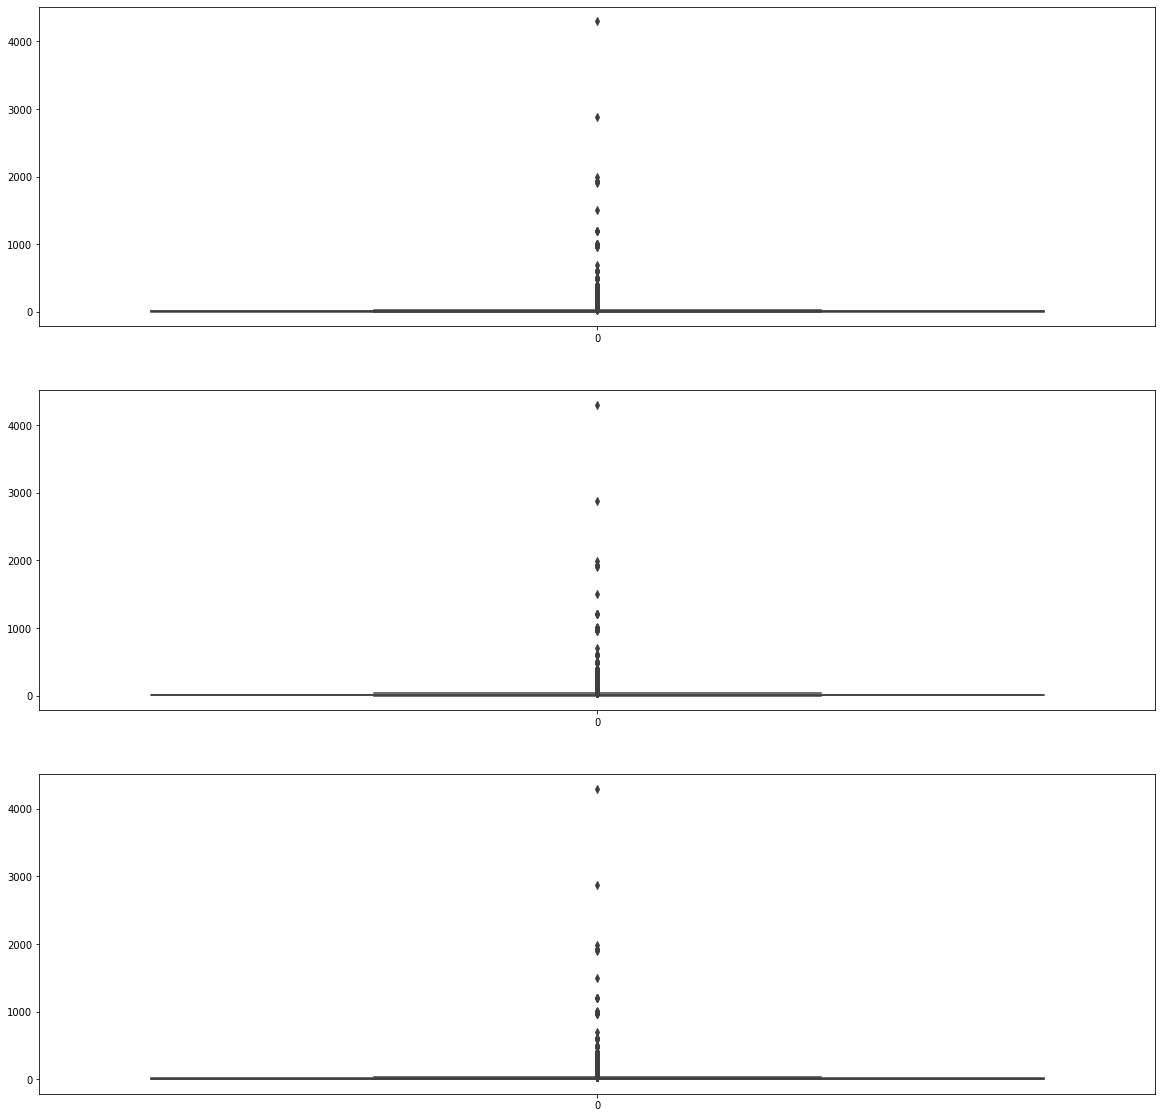

In [159]:
# Draw box plots for each numeric variable.
fig,ax = plt.subplots(3,1,figsize=(20,20))
sns.boxplot(ax=ax[0],data=online_history[numeric_columns[0]])
sns.boxplot(ax=ax[1],data=online_history[numeric_columns[0]])
sns.boxplot(ax=ax[2],data=online_history[numeric_columns[0]])









# Identify and remove outliers

In [160]:
# This function returns the lower and upper bounds of a numeric input variable.

def calc_outliers(var):
    q3 = np.percentile(var, 75) 
    q1 = np.percentile(var, 25)

    iqr = 1.5 * (q3 - q1)

    lb = q1 - iqr
    ub = q3 + iqr

    print('Lower bound of outliers:', round(lb, 2), '\nUpper bound of outliers:', round(ub, 2))
    
    return lb, ub

In [161]:
# Identify the shape of the data before removing outliers.


online_history.shape

(12435, 24)

In [162]:
# Call the calc_outliers() function iteratively for each numeric variable.
# For each variable:
#     Remove the outliers that are higher than the upper bounds.
#     Remove the variables that are lower than the lower bounds.
# As you iterate through each variable, print the shape of the data after the outliers for that variable are removed.
for col in numeric_columns:
    lb_ub = calc_outliers(online_history[col])
    rows_to_drop = online_history[(online_history[col]<lb_ub[0])|(online_history[col]>lb_ub[1])]
    online_history.drop(rows_to_drop.index,inplace=True)
    print(online_history.shape)



Lower bound of outliers: -15.0 
Upper bound of outliers: 33.0
(11480, 24)
Lower bound of outliers: -3.3 
Upper bound of outliers: 9.9
(10086, 24)
Lower bound of outliers: -11.7 
Upper bound of outliers: 40.3
(9133, 24)


# Save the final dataset as a pickle file

In [163]:
# Save the final dataset as a pickle file named online_history_cleaned_final.pickle.
online_history.to_pickle('online_history_cleaned_final.pickle')
